------------- state = work -------------
7007
dff max = 46.057307720184326
dff min = 1.1920928955078125e-05
dff average = 0.9407268297474082
dff 90 percentile = 1.6185784339904794


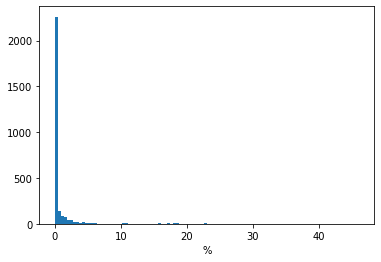

work --> 6528
eating --> 353
reading --> 126


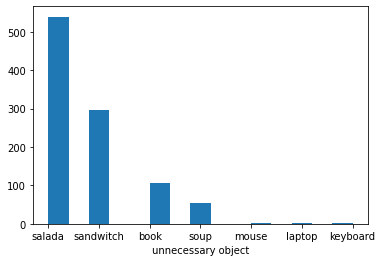

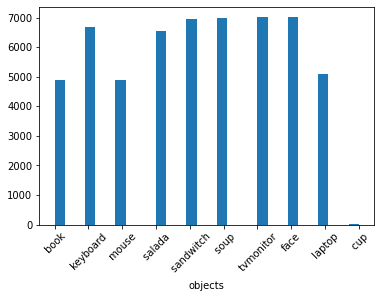

------------- state = eating -------------
6951
dff max = 48.35208058357239
dff min = 1.1920928955078125e-05
dff average = 0.8826859833038959
dff 90 percentile = 1.6185784339904794


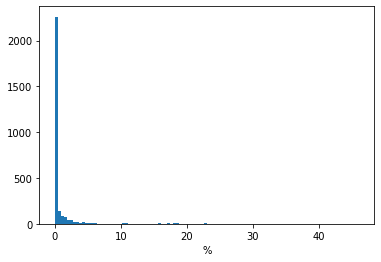

work --> 133
eating --> 6789
reading --> 29


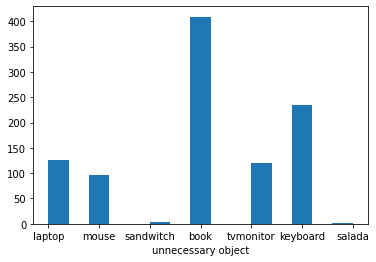

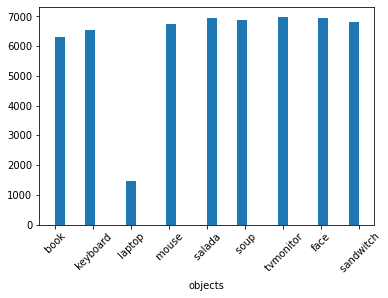

------------- state = reading -------------
6867
dff max = 45.58758735656738
dff min = 2.384185791015625e-05
dff average = 1.1159154429947833
dff 90 percentile = 1.6185784339904794


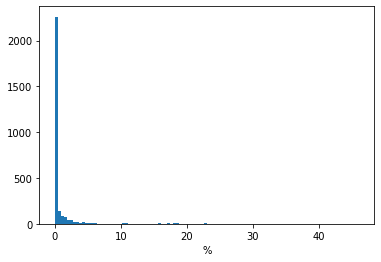

work --> 466
eating --> 513
reading --> 5888


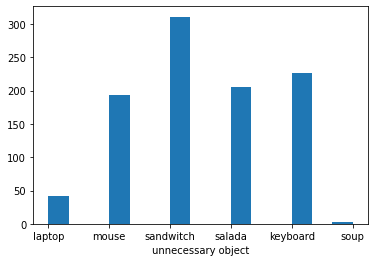

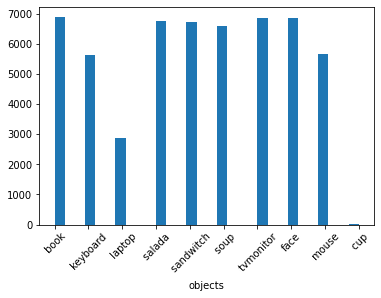

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

user_name = ''

path0 = '~/Desktop/python_ws/master_project/script/experiment_data/'+user_name+'/position_data/pattern_0_analyzed.csv'
path1 = '~/Desktop/python_ws/master_project/script/experiment_data/'+user_name+'/position_data/pattern_1_analyzed.csv'
path2 = '~/Desktop/python_ws/master_project/script/experiment_data/'+user_name+'/position_data/pattern_2_analyzed.csv'
path_dict = {'work':path0,'eating':path1,'reading':path2}
for state, path in path_dict.items():
    print(f'------------- state = {state} -------------')
    df = pd.read_csv(path, header=0)
    print(len(df))
    diff =  np.array(df['diff'].dropna())

    # 確率の上昇値の統計量
    print(f'dff max = {diff.max()}')
    print(f'dff min = {diff.min()}')
    print(f'dff average = {diff.mean()}')
    print(f'dff 90 percentile = {np.percentile(diff_average, 90)}')
    
    # 確率の上昇値の分布
    plt.hist(diff_average, bins=100)
    plt.xlabel('%')
    plt.show()
    
    # ノードを取り除いた時にどの状態として認識されるかするか
    print(f"work --> {len(df[df['dummy_state']=='work'])}")
    print(f"eating --> {len(df[df['dummy_state']=='eating'])}")
    print(f"reading --> {len(df[df['dummy_state']=='reading'])}")
    
    # 物体別の片付け対象と判定された頻度（ヒストグラム）
    is_unnecessary_df = df[df['is_unnecessary']==True]
    plt.hist(list(is_unnecessary_df['removed_obj']), bins=15)
    plt.xlabel('unnecessary object')
    plt.show()
    
    # 各物体の登場回数（ヒストグラム）
    obj_4_real = ["face", "tvmonitor", "laptop", "mouse", "keyboard", "book", "banana", "apple", "orange", "pizza","cup"]
    obj_4_marker = ['toast', 'sandwitch', 'cereal', 'scrambled egg', 'soup', 'salada', 'donut']
    obj_list = obj_4_real+obj_4_marker
    all_obj = []
    for objects in df['objects']:
        objects = objects.replace('[','').replace(']','').replace("'",'').split(",")
        objects.sort()
        all_obj += objects
    plt.hist(all_obj, bins=30)
    plt.xticks(rotation=45)
    plt.xlabel('objects')
    plt.show()
            